In [4]:
# Install necessary libraries
!pip install opencv-python matplotlib sklearn

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [5]:
# Simulated Dataset
def create_sample_dataset(image_size=64, num_images=100):
    """Creates a sample dataset of random crops and weeds."""
    crops = [np.random.rand(image_size, image_size, 3) for _ in range(num_images//2)]
    weeds = [np.random.rand(image_size, image_size, 3) for _ in range(num_images//2)]
    labels = [0] * (num_images // 2) + [1] * (num_images // 2)  # 0: crop, 1: weed
    images = crops + weeds
    return np.array(images), np.array(labels)

In [6]:
# Create dataset
images, labels = create_sample_dataset()
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

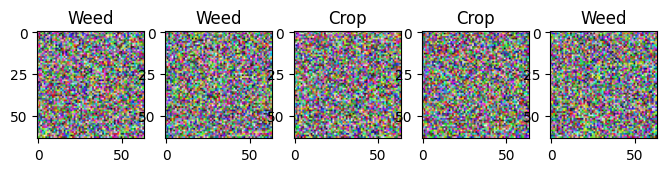

In [7]:
# Display sample images
plt.figure(figsize=(8, 4))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(X_train[i])
    plt.title("Weed" if y_train[i] == 1 else "Crop")
plt.show()


In [8]:
# Install TensorFlow
!pip install tensorflow

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [9]:
# Normalize images
X_train = X_train / 255.0
X_test = X_test / 255.0
y_train = to_categorical(y_train, 2)
y_test = to_categorical(y_test, 2)

In [10]:
# Define CNN model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(64, 64, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(2, activation='softmax')
])

C:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Train model
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 360ms/step - accuracy: 0.5375 - loss: 0.6947 - val_accuracy: 0.4000 - val_loss: 0.6992
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 266ms/step - accuracy: 0.4414 - loss: 0.6956 - val_accuracy: 0.4000 - val_loss: 0.6934
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.5367 - loss: 0.6926 - val_accuracy: 0.4000 - val_loss: 0.6943
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 156ms/step - accuracy: 0.5422 - loss: 0.6934 - val_accuracy: 0.4000 - val_loss: 0.6948
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 173ms/step - accuracy: 0.5203 - loss: 0.6934 - val_accuracy: 0.4000 - val_loss: 0.6948
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step - accuracy: 0.5008 - loss: 0.6933 - val_accuracy: 0.4000 - val_loss: 0.6949
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 179ms/step - accuracy: 0.4852 - loss: 0.6935 - val_accuracy: 0.4000 - val_loss: 0.6951
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 208ms/step - accuracy: 0.5047 - loss: 0.6938 - val_accuracy: 0.4000 - val_loss:

In [13]:
# Evaluate
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 169ms/step - accuracy: 0.4000 - loss: 0.6962
Test Accuracy: 40.00%


In [14]:
def classify_image(image):
    """Classify an image as weed or crop."""
    image = cv2.resize(image, (64, 64)) / 255.0
    image = np.expand_dims(image, axis=0)
    prediction = model.predict(image)
    return "Weed" if np.argmax(prediction) == 1 else "Crop"



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 274ms/step


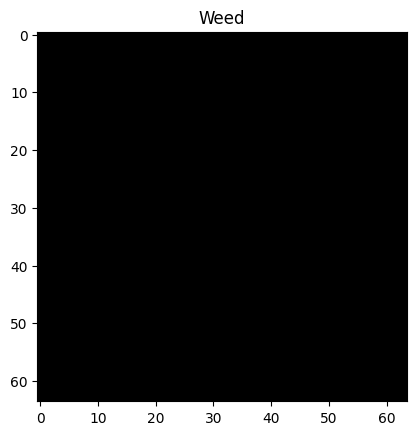

In [15]:
# Test classification
sample_image = X_test[0] * 255
plt.imshow(sample_image.astype('uint8'))
plt.title(classify_image(sample_image))
plt.show()

In [16]:
def annotate_field_image(field_image):
    """Annotates a field image with weed and crop predictions."""
    h, w, _ = field_image.shape
    patch_size = 64
    for i in range(0, h, patch_size):
        for j in range(0, w, patch_size):
            patch = field_image[i:i+patch_size, j:j+patch_size]
            if patch.shape[0] != patch_size or patch.shape[1] != patch_size:
                continue
            label = classify_image(patch)
            cv2.rectangle(field_image, (j, i), (j+patch_size, i+patch_size), (0, 255, 0) if label == "Crop" else (0, 0, 255), 2)
    return field_image



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 355ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 162ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 122ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 205ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 323ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 146ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 111ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


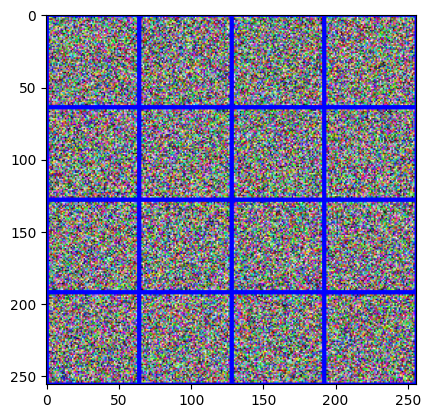

In [17]:
# Annotate and display
field_image = np.random.rand(256, 256, 3) * 255  # Simulated field image
annotated_image = annotate_field_image(field_image.astype('uint8'))
plt.imshow(annotated_image)
plt.show()